In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import category_encoders as ce
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report,f1_score

In [2]:
df=  pd.read_csv('Voices_Cleaned1.csv', index_col=0)

In [3]:
df.head()

,mean,std,median,first_q,third_q,inter_q,skewness,kurtosis,mode,peak,date,user,age,pronounce,sex
0,162.598425,52.379785,180.0,110.0,210.0,100.0,-0.100126,-1.513975,90.0,250.0,20100710,1028,Adult,American,0
1,211.916667,24.504960,210.0,200.0,230.0,30.0,-1.768135,6.622069,210.0,250.0,20170321,1337ad,Adult,Unknown,1
2,207.575758,34.974476,210.0,200.0,230.0,30.0,-1.803365,3.801466,200.0,250.0,20170321,1337ad,Adult,Unknown,1
4,180.909091,37.039180,180.0,160.0,210.0,50.0,-0.372419,-0.448122,180.0,250.0,20120412,1snoke,Adult,American,0
5,148.972431,51.514539,130.0,100.0,200.0,100.0,0.583655,-1.043253,100.0,250.0,20100807,23yipikaye,Adult,Unknown,0


## In this first model, I will not use metadata columns as features, so I drop date, user, age and prounounce cols:

In [4]:
df= df.drop(columns=['date','age','user','pronounce'])

In [5]:
df_train, df_test = train_test_split(df, random_state=23, test_size=.2)

In [6]:
model_features = ['mean','std','median','first_q', 'third_q', 'inter_q', 'skewness', 'kurtosis','mode','peak']

In [7]:
scaler = StandardScaler()
scaler.fit(df_train.loc[:,model_features]) 
X_train = scaler.transform(df_train.loc[:,model_features])
X_test = scaler.transform(df_test.loc[:,model_features])
y_train = list(df_train['sex'].values)
y_test = list(df_test['sex'].values)

In [8]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=23).fit(X_train, y_train)
print('Decision Tree Report')
print('train score is %s' %tree.score(X_train, y_train))
print('test score is %s' %tree.score(X_test, y_test))



#Train random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=23).fit(X_train, y_train)
print('Random Forests Report')
print('train score is %s' %forest.score(X_train, y_train))
print('test score is %s' %forest.score(X_test, y_test))


#Train gradient boosting model
gb = GradientBoostingClassifier(random_state=23).fit(X_train, y_train)
print('Gradient Boosting Report')
print('train score is %s' %gb.score(X_train, y_train))
print('test score is %s' %gb.score(X_test, y_test))



Decision Tree Report
train score is 1.0
test score is 0.9071090047393365
Random Forests Report
train score is 0.9997628083491461
test score is 0.933649289099526
Gradient Boosting Report
train score is 0.9511385199240987
test score is 0.9298578199052133


## Since we know the data is imbalanced, it is expected that model is simply neglecting female samples and provide such high  accuracy score!


## For this reason I will create the confusion matrix for each of the models and take a look on it!

In [9]:
def create_report(model,X_train,X_test,y_train,y_test):
    clf= model
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)

    metrics_matrix=confusion_matrix(y_test,pred)
    print("the accuracy for this model is :",(metrics_matrix[0,0]+metrics_matrix[1,1])/(metrics_matrix[0,0]+metrics_matrix[0,1]+metrics_matrix[1,0]+metrics_matrix[1,1]))
    print("the miss_classification for this model is :",(metrics_matrix[0,1]+metrics_matrix[1,0])/(metrics_matrix[0,0]+metrics_matrix[0,1]+metrics_matrix[1,0]+metrics_matrix[1,1]))
    print("the recall for this model is :",metrics_matrix[1,1]/(metrics_matrix[1,1]+metrics_matrix[1,0]))
        
    fig= plt.figure(figsize=(6,3))
    print("TP",metrics_matrix[1,1]) 
    print("TN",metrics_matrix[0,0]) 
    print("FP",metrics_matrix[0,1]) 
    print("FN",metrics_matrix[1,0])
    sns.heatmap(metrics_matrix,cmap="coolwarm",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_Sex")
    plt.ylabel("Real_Sex")
    plt.show()
    print("\n----------Classification Report----------")
    print(classification_report(y_test,pred))
    

the accuracy for this model is : 0.9071090047393365
the miss_classification for this model is : 0.09289099526066351
the recall for this model is : 0.37037037037037035
TP 30
TN 927
FP 47
FN 51


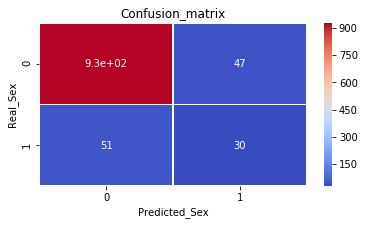


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       974
           1       0.39      0.37      0.38        81

   micro avg       0.91      0.91      0.91      1055
   macro avg       0.67      0.66      0.66      1055
weighted avg       0.90      0.91      0.91      1055



In [10]:
create_report(DecisionTreeClassifier(random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.933649289099526
the miss_classification for this model is : 0.06635071090047394
the recall for this model is : 0.24691358024691357
TP 20
TN 965
FP 9
FN 61


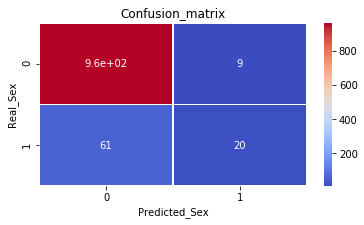


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       974
           1       0.69      0.25      0.36        81

   micro avg       0.93      0.93      0.93      1055
   macro avg       0.82      0.62      0.66      1055
weighted avg       0.92      0.93      0.92      1055



In [11]:
create_report(RandomForestClassifier(n_estimators=100,random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.9298578199052133
the miss_classification for this model is : 0.07014218009478673
the recall for this model is : 0.19753086419753085
TP 16
TN 965
FP 9
FN 65


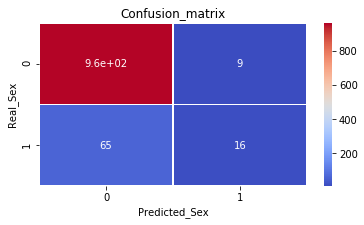


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       974
           1       0.64      0.20      0.30        81

   micro avg       0.93      0.93      0.93      1055
   macro avg       0.79      0.59      0.63      1055
weighted avg       0.91      0.93      0.91      1055



In [12]:
create_report(GradientBoostingClassifier(random_state=23),X_train,X_test,y_train,y_test)